# Animal hematology

In [1]:
library(tidyverse)
library(data.table)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
# load the heamatology data
raw_hematology <- fread('animal_hematology_irf.tsv')

In [3]:
# inspect the data
head(raw_hematology)

Subject ID,Subject Group,Thing,day,value
<chr>,<chr>,<chr>,<chr>,<dbl>
NHP C1,0. Non-infected,Basophil Counts (10^3/ul),BL-1,0.01
NHP C1,0. Non-infected,Basophil Counts (10^3/ul),BL-2,0.02
NHP C1,0. Non-infected,Basophil Counts (10^3/ul),Day 1,NA
NHP C1,0. Non-infected,Basophil Counts (10^3/ul),Day 2,NA
NHP C1,0. Non-infected,Basophil Counts (10^3/ul),Day 3,NA
NHP C1,0. Non-infected,Basophil Counts (10^3/ul),Day 4,NA


In [4]:
# fix column names
colnames(raw_hematology) <- c('subject_id','subject_group','measurement','time','value')

In [5]:
# convert to factor where suitable
raw_hematology$subject_id <- as.factor(raw_hematology$subject_id)
raw_hematology$subject_group <- as.factor(raw_hematology$subject_group)
raw_hematology$measurement <- as.factor(raw_hematology$measurement)
raw_hematology$time <- as.factor(raw_hematology$time)

In [7]:
# initial inspection plot

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(raw_hematology, aes(x=time,y=value,color=subject_id)) + 
    geom_jitter(height=0,width=2e-1) + 
    facet_wrap(~measurement, scales='free_y') + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    theme_bw()

Warning message:
“Removed 1957 rows containing missing values (`geom_point()`).”


In [9]:
ggsave('output/hematology_plots_overview.png',w=15,h=10)

Warning message:
“Removed 1957 rows containing missing values (geom_point).”


Warning message:
“Removed 163 rows containing missing values (geom_point).”


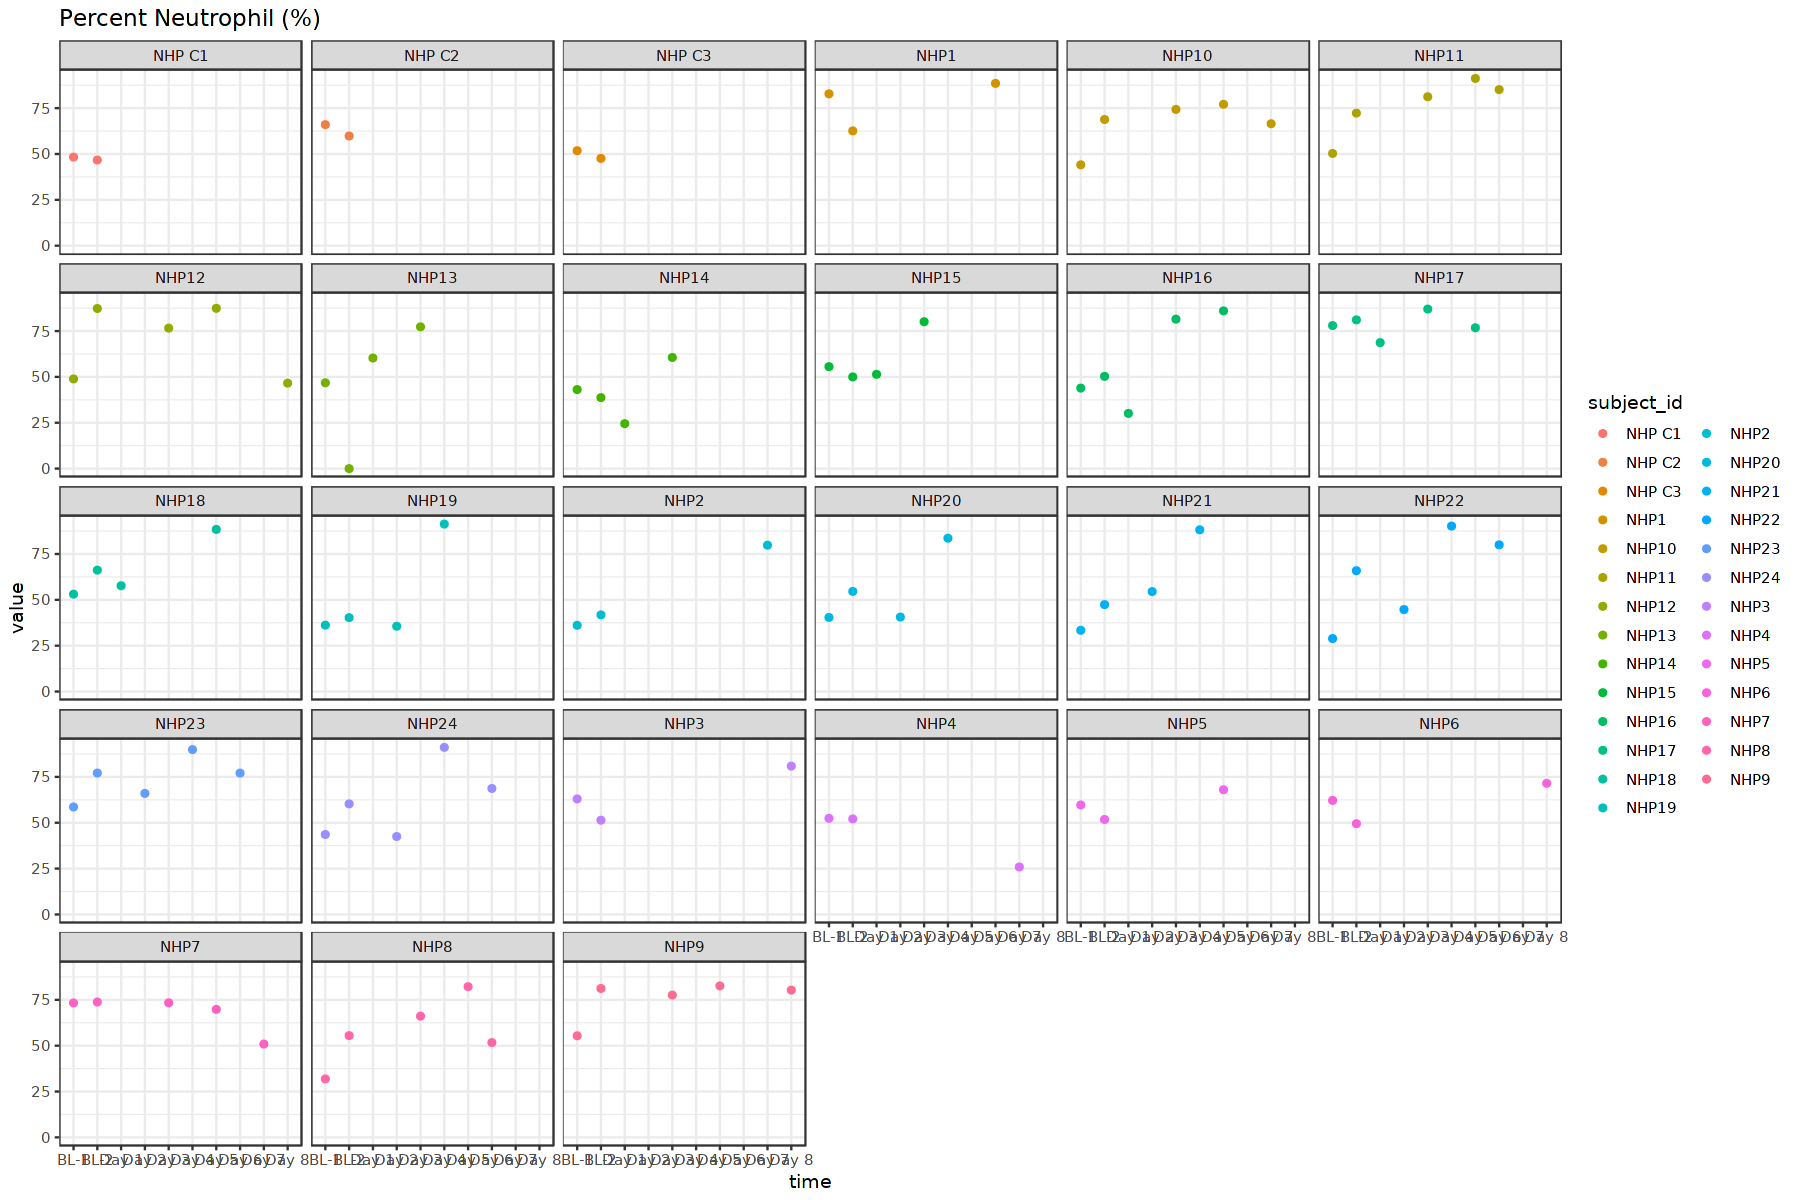

In [16]:
measurement_display  <- 'Percent Neutrophil (%)'
raw_hematology %>% subset(measurement == measurement_display) %>%
    ggplot(aes(x=time, y=value, color=subject_id)) +
    geom_point() +
    theme_bw() + 
    facet_wrap(~subject_id) + 
    ggtitle(measurement_display)

In [7]:
raw_hematology %>% select(measurement) %>% unique()

measurement
<fct>
Basophil Counts (10^3/ul)
Eosinophil Counts (10^3/ul)
Lymphocyte Counts (10^3/ul)
Mean Platelet Volume (femto)
Monocyte Counts (10^3/ul)
Neutrophil Count (10^3/ul)
Percent Basophil (%)
Percent Eosinophil (%)
Percent Lymphocyte (%)


In [ ]:
measurement_display  <- 'Neutrophil Count (10^3/ul)'
raw_hematology %>% subset(measurement == measurement_display) %>%
    ggplot(aes(x=time, y=value, color=subject_id)) +
    geom_point() +
    theme_bw() + 
    facet_wrap(~subject_id) + 
    ggtitle(measurement_display)

Warning message:
“Removed 163 rows containing missing values (`geom_point()`).”


Warning message:
“Removed 163 rows containing missing values (geom_point).”


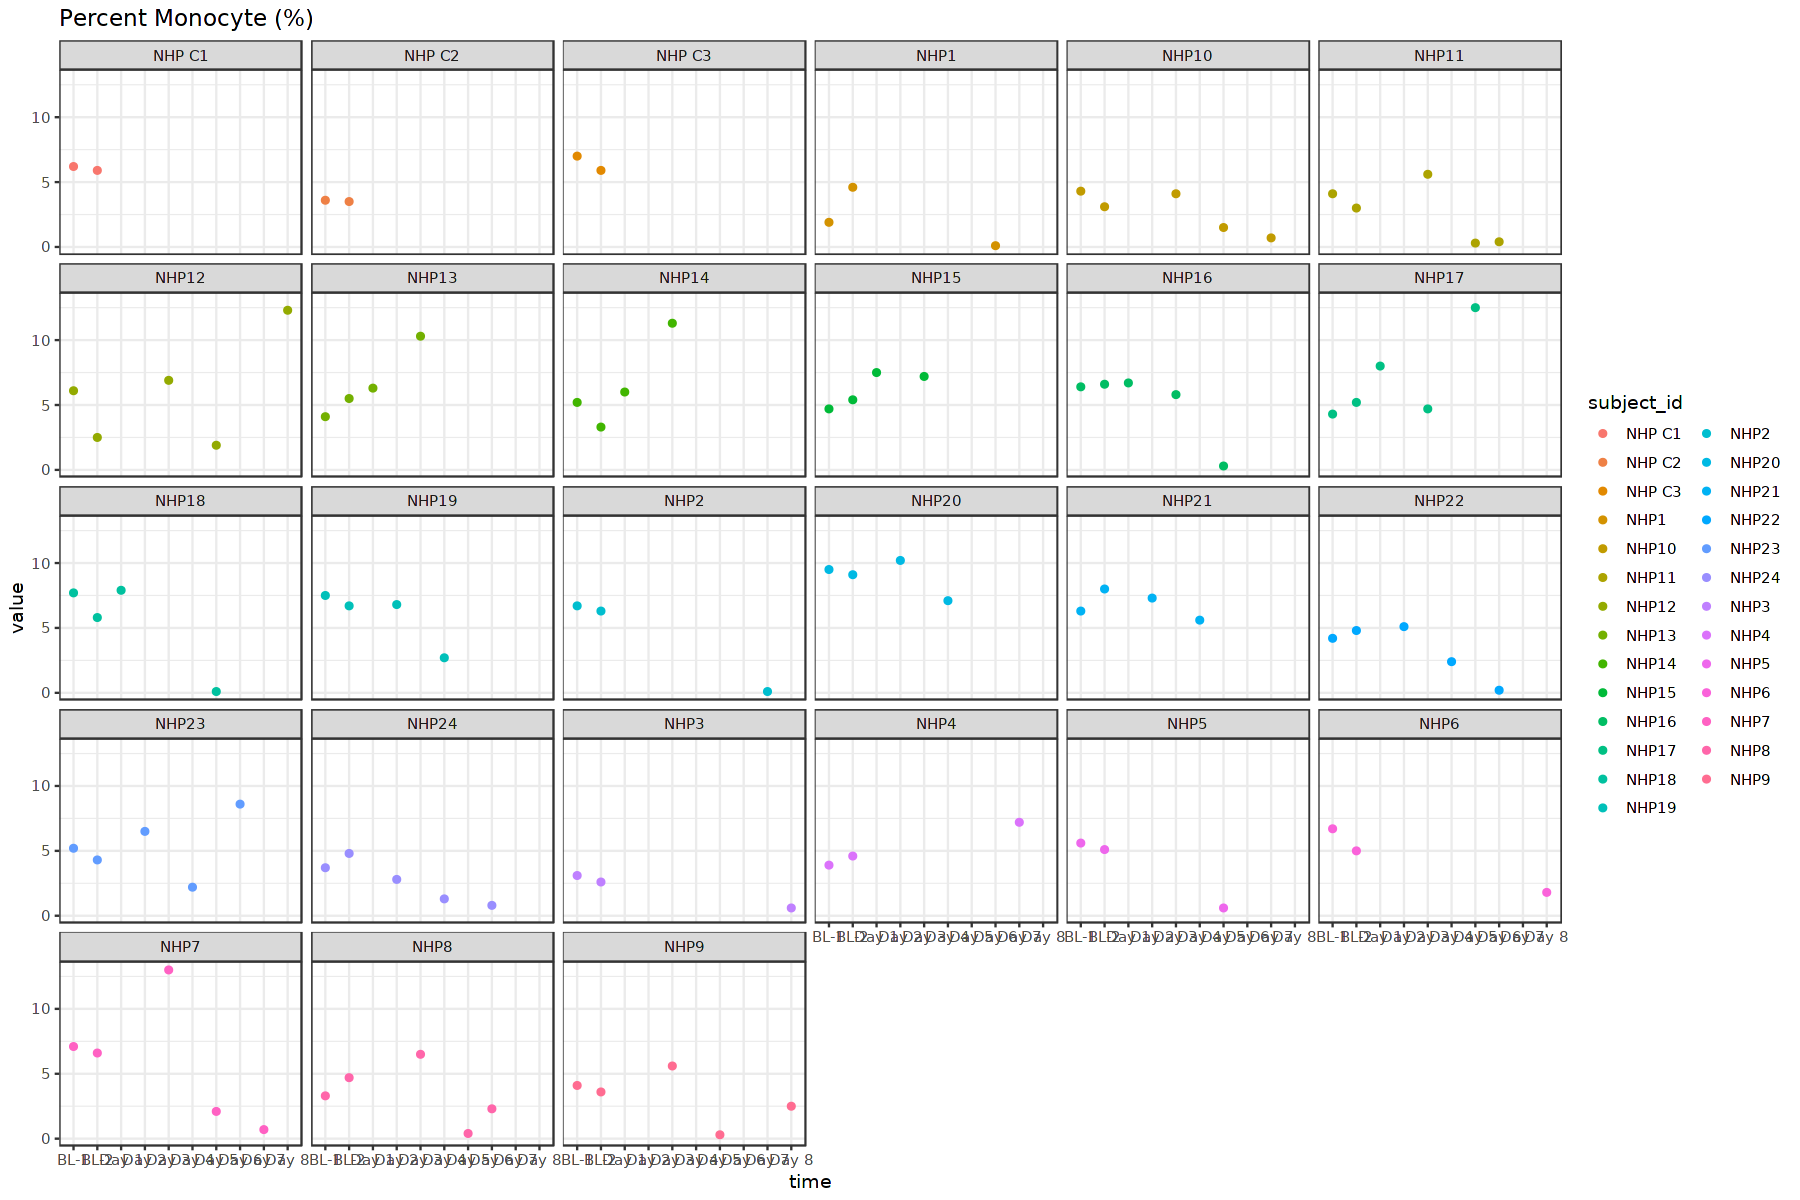

In [20]:
measurement_display  <- 'Percent Monocyte (%)'
raw_hematology %>% subset(measurement == measurement_display) %>%
    ggplot(aes(x=time, y=value, color=subject_id)) +
    geom_point() +
    theme_bw() + 
    facet_wrap(~subject_id) + 
    ggtitle(measurement_display)

In [21]:
measurement_display  <- 'Percent Neutrophil (%)'
head(raw_hematology %>% subset(measurement == measurement_display))
P1<-raw_hematology %>% 
  subset(measurement == measurement_display) %>%
  ggplot(aes(x = time, y = value)) +
  geom_boxplot() +
  geom_jitter(width = 0.2, alpha = 0.5) + # adding jittered points
  theme_bw() +
  ggtitle(measurement_display)

subject_id,subject_group,measurement,time,value
<fct>,<fct>,<fct>,<fct>,<dbl>
NHP C1,0. Non-infected,Percent Neutrophil (%),BL-1,48.3
NHP C1,0. Non-infected,Percent Neutrophil (%),BL-2,46.7
NHP C1,0. Non-infected,Percent Neutrophil (%),Day 1,NA
NHP C1,0. Non-infected,Percent Neutrophil (%),Day 2,NA
NHP C1,0. Non-infected,Percent Neutrophil (%),Day 3,NA
NHP C1,0. Non-infected,Percent Neutrophil (%),Day 4,NA


Warning message:
“Removed 163 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 163 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 163 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 163 rows containing missing values (`geom_point()`).”


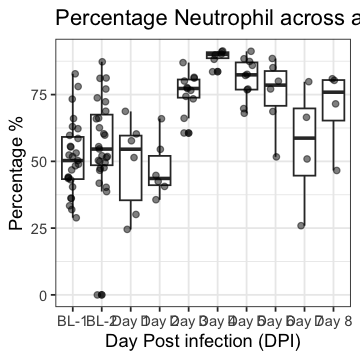

In [40]:
library(ggplot2)
options(repr.plot.width = 3, repr.plot.height = 3)
P1+ylab("Percentage %")+xlab("Day Post infection (DPI)")+ggtitle("Percentage Neutrophil across all animals")
ggsave("PlotFigureNeutro.pdf", width =4, height = 5)



Warning message:
“Removed 163 rows containing non-finite values (`stat_boxplot()`).”


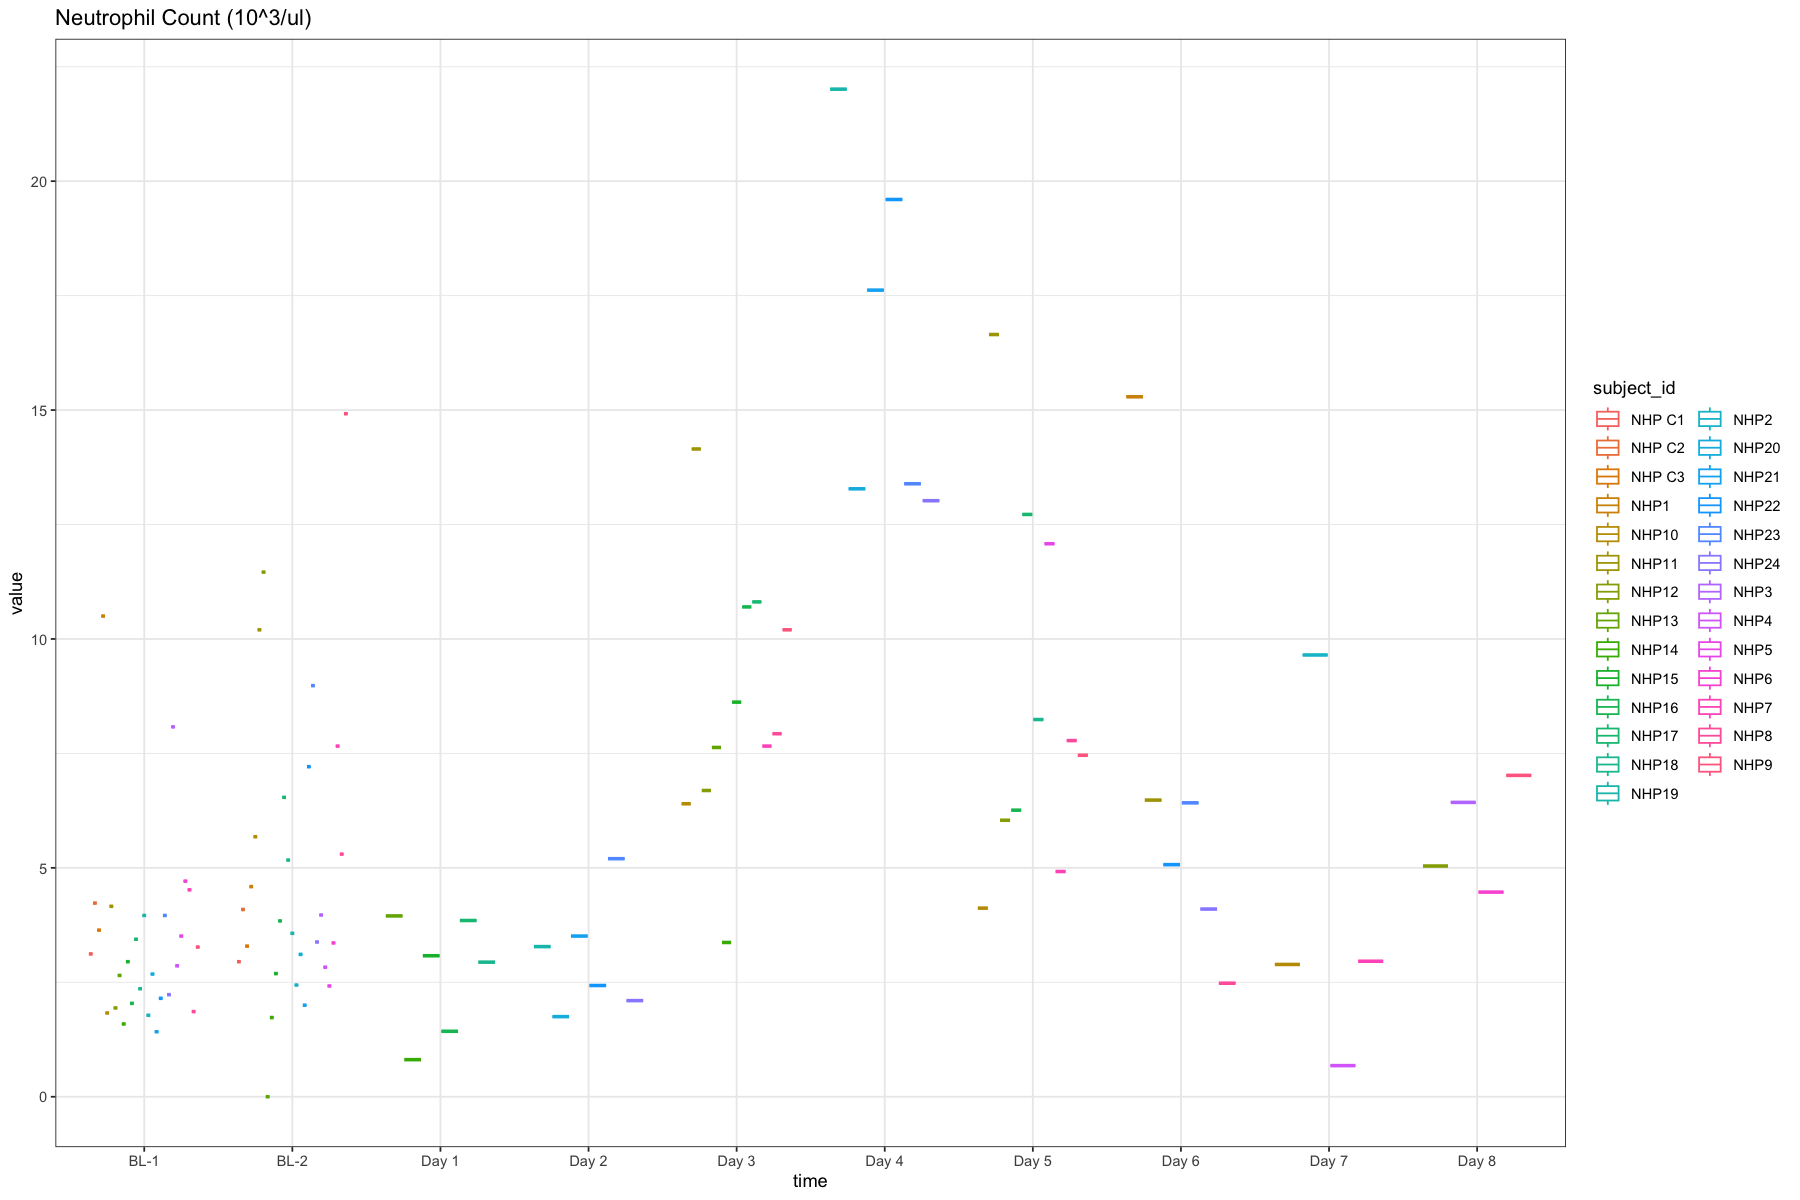

In [10]:
raw_hematology %>% 
  subset(measurement == measurement_display) %>%
  ggplot(aes(x = time, y = value, color = subject_id)) +
  geom_boxplot() +
  theme_bw() +
  ggtitle(measurement_display)